In [252]:
from ds_utils.ds_preamble import *
from ds_utils.ds_plotting import *
from ds_utils.ds_helper import *
import re

In [253]:
df = pd.read_csv('mdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66836 entries, 0 to 66835
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   contract_no     66836 non-null  int64  
 1   ins_idn         66836 non-null  int64  
 2   age_5           66836 non-null  int64  
 3   gender          66836 non-null  object 
 4   is_smoker       66836 non-null  int64  
 5   weight          64237 non-null  object 
 6   height          64813 non-null  object 
 7   occ_life_cover  65910 non-null  object 
 8   g_self_v1       66135 non-null  float64
 9   g_self_v2       66130 non-null  float64
 10  g_self_v3       66068 non-null  float64
 11  g_self_v4       66085 non-null  float64
 12  g_self_v5       66135 non-null  float64
 13  g_self_v6       66102 non-null  float64
 14  g_self_v7       66130 non-null  float64
 15  g_self_v8       66150 non-null  float64
 16  m_exam_v1_i     9249 non-null   float64
 17  m_exam_v2_i     9238 non-null  

In [ ]:
df.query(weight.notna())

In [177]:
df.decision.value_counts()

std        57479
substd      6015
decline     3342
Name: decision, dtype: int64

In [178]:
df[['g_self_v1','age_5','occ_life_cover']].dtypes

g_self_v1         float64
age_5               int64
occ_life_cover     object
dtype: object

[None]

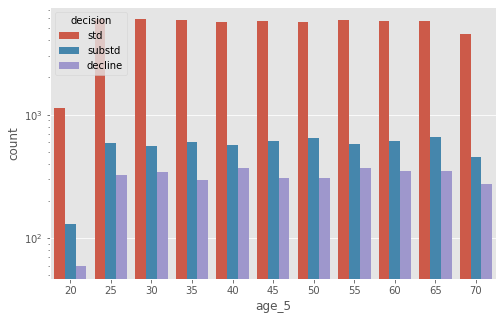

In [179]:
# sns.countplot(data=df, x='decision').set(yscale='log')
sns.countplot(data=df, hue='decision', x='age_5').set(yscale='log')
# sns.countplot(data=df, x='decision', hue='age_5')

In [180]:
df.weight[df.weight.isna()]
df.weight[:30]

21       NaN
35       NaN
39       NaN
45       NaN
57       NaN
        ... 
66764    NaN
66780    NaN
66812    NaN
66823    NaN
66830    NaN
Name: weight, Length: 2599, dtype: object

0       160.6 lbs
1          64.4KG
2         58.1 kg
3          56.6Kg
4        69.9 kg 
5         54.7 KG
6       140.36Lbs
7      162.58 Lbs
8      141.02 Lbs
9      148.28lbs 
10        74.8KG 
11        51.7 kg
12      150.04Lbs
13         176lbs
14       65.2 kg 
15        64.9 Kg
16        56.6kg 
17        64.4kg 
18      147.18lbs
19    148.94 lbs 
20         65 kg 
21            NaN
22      166.54lbs
23      135.08LBS
24     110.66LBS 
25        165Lbs 
26        51.4kg 
27      108.9 lbs
28       61.9 kg 
29     101.86 Lbs
Name: weight, dtype: object

In [181]:
# df.weight.sample(50)
df.weight
t1 = df.weight.str.extract(r'(\d+\.?\d*)')[0].astype(float)
# t1[:30]
# t1[t1.isna()]

t2 = df.weight.str.contains(r'lb', case=False)
# t2

df['weight'] = np.where(t2, t1*0.453592, t1)
df.weight.isna().sum()

0          160.6 lbs
1             64.4KG
2            58.1 kg
3             56.6Kg
4           69.9 kg 
            ...     
66831     139.48 lbs
66832     147.84LBS 
66833       119.9LBS
66834    143.22 lbs 
66835     132.66 Lbs
Name: weight, Length: 66836, dtype: object

2599

In [182]:
# df.height.isna().sum()
t1 = df.height.str.extract(r'(\d+\.?\d*)')[0].astype(float)

# df.height.str.extract(r'((?i)(?<!c)m)|((?i)cm)|((?i)in)', expand=False)[:30]
t2 = df.height.str.extract(r'((?<!c)m)|(cm)|(in)',  re.IGNORECASE, expand=False)
t2.columns = ['m','cm','in']

t1
t2


# M1 to change to cm
# t1 = np.where(t2['m'].notna(), t1*100, t1)
# t1
# t1 = np.where(t2['in'].notna(), t1*2.54, t1)

0        170.20
1        168.10
2           NaN
3        158.10
4         64.09
          ...  
66831     65.43
66832    174.60
66833     70.00
66834     65.71
66835     63.31
Name: 0, Length: 66836, dtype: float64

,m,cm,in
0,NaN,Cm,NaN
1,NaN,cm,NaN
2,NaN,NaN,NaN
3,NaN,Cm,NaN
4,NaN,NaN,In
...,...,...,...
66831,NaN,NaN,IN
66832,NaN,cm,NaN
66833,NaN,NaN,IN
66834,NaN,NaN,In


In [183]:
t1 = np.where(df.height.str.contains('((?<!c)m)', flags=re.IGNORECASE).replace({np.nan: False}), t1*100, t1)
t1 = np.where(df.height.str.contains('in', flags=re.IGNORECASE).replace({np.nan: False}), t1*2.54, t1)
df.height = t1
# df.height.str.contains('(?<!c)m')
# df.height.str.contains('(?<!c)m').notna()
# np.where(df.height.str.contains('(?<!c)m').notna(), 1, -1)[:10]

/var/folders/c2/yj8ksjmn34v5f9csr1s82d8r0000gn/T/ipykernel_79405/2633932207.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  t1 = np.where(df.height.str.contains('((?<!c)m)', flags=re.IGNORECASE).replace({np.nan: False}), t1*100, t1)


In [172]:
# M1. best
# df_small = df.filter(regex='^g_self_.*$')

# df.filter(regex='^g_self_.*$') 

# df.loc[:, df.columns.str.contains('^g_self_.*$')] = df_small.fillna(0)

cols_needed = df.columns[df.columns.str.contains('^g_self_.*$')]

In [184]:
df = df.fillna(pd.Series(0, index=cols_needed))

In [188]:
cols_needed = df.columns[df.columns.str.contains('^m_exam_.*_i$')]
df = df.fillna(pd.Series('unk', index=cols_needed))

In [192]:
df = df.fillna({'occ_life_cover':'STD'})

In [208]:
df['m_exam_v7'] = df.filter(regex='m_exam_v7_[123]').mean(axis=1)
df['m_exam_v8'] = df.filter(regex='m_exam_v8_[123]').mean(axis=1)


In [210]:
df.rename(columns={'height':'height_cm', 'weight':'weight_kg'}, inplace=True)

In [219]:
cols = ['weight_kg', 'height_cm', 'm_exam_v9_cm', 'm_exam_v10_cm', 'm_exam_v7', 'm_exam_v8']

df[cols] = df.groupby(['gender','age_5'])[cols].transform(lambda s: s.median())
# df[['gender','age_5']].isna().sum()


In [247]:
df = df.drop(df.filter(regex='m_exam_v[78]_[123]').columns, axis=1)
